In [1]:
#imported python modules
from tensorflow.compat.v1.keras import datasets, layers, models, backend
from tensorflow.compat.v1.keras.utils import plot_model
import matplotlib.pyplot as plt
import heapq
import numpy as np

In [19]:
#Load the dataset as per assignment instructions in question one
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

# normalize data
X_train = X_train / 255.0
X_test = X_test / 255.0

In [3]:
#begin defining the five models as per the requirements in question two
def model1():
    # model: 1 convolution layers and 1 fully connected layer
    #        conv -> maxpool -> FC -> out
    model = models.Sequential([
        # layer 1 - conv
        layers.Conv2D(filters=32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2), strides=(2, 2), padding='valid'),  ##
                
        layers.Flatten(),
        # layer 2 - FC
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.25),
        # out
        layers.Dense(10, activation='softmax')
    ])
    
    model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
        
    plot_model(model, to_file='model1.png')
    
    history = model.fit(X_train, y_train, batch_size=128, validation_data=(X_test,y_test), epochs=15, verbose=1)
    
    return history, model

In [4]:
# based on LeNet5
def model2():
    # model: 2 convolution layers and 1 fully connected layer
    #        conv -> maxpool -> conv -> maxpool -> FC -> out
    model = models.Sequential([
        # layer 1 - conv
        layers.Conv2D(filters=32, kernel_size=(3, 3),padding='valid', activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2),strides=2,padding='valid'),
        # layer 2 - conv
        layers.Conv2D(filters=64, kernel_size=(3, 3),padding='valid',activation='relu'),
        layers.MaxPooling2D((2, 2),strides=2,padding='valid'),

        layers.Flatten(),
        # layer 3 - FC
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.25),
        # out
        layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
        
    plot_model(model, to_file='model2.png')
    
    history = model.fit(X_train, y_train, batch_size=128, validation_data=(X_test,y_test), epochs=15, verbose=1)
    
    return history, model

In [5]:
def model3():
    # model: 2 convolution layers and 1 fully connected layer
    #        conv -> conv -> maxpool -> out
    model = models.Sequential([
        # layer 1 - conv
        layers.Conv2D(filters=32, kernel_size=(3, 3),padding='valid', activation='relu', input_shape=(32, 32, 3)),
        # layer 2 - conv
        layers.Conv2D(filters=64, kernel_size=(3, 3),padding='valid',activation='relu'),
        layers.MaxPooling2D((2, 2),strides=2,padding='valid'),

        layers.Flatten(),
        # layer 3 - FC
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.25),
        # out
        layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
        
    plot_model(model, to_file='model3.png')
    
    history = model.fit(X_train, y_train, batch_size=128, validation_data=(X_test,y_test), epochs=15, verbose=1)
    
    return history, model

In [6]:
def model4():
    # model: 2 convolution layers and 2 fully connected layer
    #        conv -> maxpool -> conv -> maxpool -> FC -> FC -> out
    model = models.Sequential([
        # layer 1 - conv
        layers.Conv2D(filters=32, kernel_size=(3, 3),padding='valid', activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2),strides=2,padding='valid'),
        # layer 2 - conv
        layers.Conv2D(filters=64, kernel_size=(3, 3),padding='valid',activation='relu'),
        layers.MaxPooling2D((2, 2),strides=2,padding='valid'),

        layers.Flatten(),
        # layer 3 - FC
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.25),
        # layer 4 - FC
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.25),
        # out
        layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
        
    plot_model(model, to_file='model4.png')
    
    history = model.fit(X_train, y_train, batch_size=128, validation_data=(X_test,y_test), epochs=15, verbose=1)
    
    return history, model

In [7]:
def model5():
    # model: 4 convolution layers and 3 fully connected layer
    #        conv -> conv -> maxpool -> conv -> conv -> maxpool -> FC -> FC -> FC -> out
    model = models.Sequential([
        # layer 1 - conv
        layers.Conv2D(filters=32, kernel_size=(3, 3),padding='valid', activation='relu', input_shape=(32, 32, 3)),
        # layer 2 - conv
        layers.Conv2D(filters=64, kernel_size=(3, 3),padding='valid',activation='relu'),
        layers.MaxPooling2D((2, 2),strides=2,padding='valid'),
        # layer 3 - conv
        layers.Conv2D(filters=64, kernel_size=(3, 3),padding='valid', activation='relu'),
        # layer 4 - conv
        layers.Conv2D(filters=64, kernel_size=(3, 3),padding='valid',activation='relu'),
        layers.MaxPooling2D((2, 2),strides=2,padding='valid'),

        layers.Flatten(),
        # layer 5 - FC
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.25),
        # layer 6 - FC
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.25),
        # layer 7 - FC
        layers.Dense(32, activation='relu'),
        layers.Dropout(0.25),
        # out
        layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
        
    plot_model(model, to_file='model5.png')
    
    history = model.fit(X_train, y_train, batch_size=128, validation_data=(X_test,y_test), epochs=15, verbose=1)
    
    return history, model

In [8]:
#matplotlib caller function used to display the graph for question three
# expected input: (plot_name1 = plot_data1, plot_name2 = plot_data2, plot_name3 = plot_data3, ...)
#                 keras model history
def plot_accuracies(**histories):
    for x, y in histories.items():
        plt.plot(y.history['accuracy'], label = x)
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend()
    plt.show()

In [9]:
#function used to collect data for the images in question four
# image should have shape (32, 32, 3)
def top_9_patches(model, history, image):
    # extract layers from model
    model_layers = [layer.output for layer in model.layers] 
    
    visual_model = models.Model(inputs = model.input, outputs = model_layers)
    
    feature_maps = visual_model.predict(np.array([image]))
    
    first_layer_maps = feature_maps[0]
    
    reshaped_maps = []
    reshape = first_layer_maps[0, :, :, :]
    
    for i in range(reshape.shape[2]):
        reshaped_maps.append(reshape[:, :, i])
    # END FOR

    # we obtain the nine largest filters by functional reduction
    top_patches = heapq.nlargest(9, reshaped_maps, key = lambda x: np.sum(x))
    
    plot_9_patches_1_image(top_patches, image)

In [10]:
#matplotlib caller function used to display the images for question four
def plot_9_patches_1_image(patches, image):
    # image
    plt.imshow(image)
    plt.axis('off')
    plt.show()
    
    # patches
    for i in range(9):
        plt.subplot(3, 3, i+1)
        fig = plt.gcf()
        fig.set_size_inches(6,6)
        plt.axis('off')
        plt.imshow(patches[i])
    plt.show()

In [11]:
#begin to run the models as per question twos requirements
his1, mod1 = model1()

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')
Epoch 1/15
391/391 [==============================] - 15s 38ms/step - loss: 2.0470 - accuracy: 0.2329 - val_loss: 1.5715 - val_accuracy: 0.4367
Epoch 2/15
391/391 [==============================] - 15s 37ms/step - loss: 1.6189 - accuracy: 0.3947 - val_loss: 1.4140 - val_accuracy: 0.4969
Epoch 3/15
391/391 [==============================] - 14s 37ms/step - loss: 1.5238 - accuracy: 0.4311 - val_loss: 1.3426 - val_accuracy: 0.5194
Epoch 4/15
391/391 [==============================] - 15s 37ms/step - loss: 1.4615 - accuracy: 0.4535 - val_loss: 1.3188 - val_accuracy: 0.5414
Epoch 5/15
391/391 [==============================] - 15s 37ms/step - loss: 1.4255 - accuracy: 0.4651 - val_loss: 1.2687 - val_accuracy: 0.5551
Epoch 6/15
391/391 [==============================] - 14s 37ms/step - loss: 1.3855 - accuracy: 0.4842 - val_loss: 1.2470 - val_accur

In [12]:
his2, mod2 = model2()

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')
Epoch 1/15
391/391 [==============================] - 25s 64ms/step - loss: 1.9216 - accuracy: 0.2914 - val_loss: 1.4355 - val_accuracy: 0.4920
Epoch 2/15
391/391 [==============================] - 25s 64ms/step - loss: 1.4506 - accuracy: 0.4748 - val_loss: 1.2293 - val_accuracy: 0.5707
Epoch 3/15
391/391 [==============================] - 25s 64ms/step - loss: 1.2994 - accuracy: 0.5296 - val_loss: 1.2184 - val_accuracy: 0.5671
Epoch 4/15
391/391 [==============================] - 25s 64ms/step - loss: 1.2306 - accuracy: 0.5608 - val_loss: 1.1408 - val_accuracy: 0.6111
Epoch 5/15
391/391 [==============================] - 25s 65ms/step - loss: 1.1531 - accuracy: 0.5906 - val_loss: 1.0391 - val_accuracy: 0.6406
Epoch 6/15
391/391 [==============================] - 25s 64ms/step - loss: 1.1066 - accuracy: 0.6118 - val_loss: 1.0477 - val_accur

In [16]:
his3, mod3 = model3()

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')
Epoch 1/15
391/391 [==============================] - 59s 149ms/step - loss: 1.9662 - accuracy: 0.2630 - val_loss: 1.4093 - val_accuracy: 0.4933
Epoch 2/15
391/391 [==============================] - 60s 152ms/step - loss: 1.4694 - accuracy: 0.4528 - val_loss: 1.2160 - val_accuracy: 0.5720
Epoch 3/15
391/391 [==============================] - 65s 167ms/step - loss: 1.3172 - accuracy: 0.5196 - val_loss: 1.1160 - val_accuracy: 0.6090
Epoch 4/15
391/391 [==============================] - 58s 149ms/step - loss: 1.2238 - accuracy: 0.5542 - val_loss: 1.1017 - val_accuracy: 0.6163
Epoch 5/15
391/391 [==============================] - 59s 151ms/step - loss: 1.1537 - accuracy: 0.5802 - val_loss: 1.0236 - val_accuracy: 0.6438
Epoch 6/15
391/391 [==============================] - 60s 154ms/step - loss: 1.1110 - accuracy: 0.5960 - val_loss: 1.0008 - val

In [14]:
his4, mod4 = model4()

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')
Epoch 1/15
391/391 [==============================] - 25s 62ms/step - loss: 1.9493 - accuracy: 0.2678 - val_loss: 1.3525 - val_accuracy: 0.5230
Epoch 2/15
391/391 [==============================] - 24s 60ms/step - loss: 1.3905 - accuracy: 0.4995 - val_loss: 1.1438 - val_accuracy: 0.5961
Epoch 3/15
391/391 [==============================] - 23s 58ms/step - loss: 1.2158 - accuracy: 0.5701 - val_loss: 1.0450 - val_accuracy: 0.6327
Epoch 4/15
391/391 [==============================] - 23s 58ms/step - loss: 1.0958 - accuracy: 0.6167 - val_loss: 0.9858 - val_accuracy: 0.6568
Epoch 5/15
391/391 [==============================] - 23s 58ms/step - loss: 1.0288 - accuracy: 0.6442 - val_loss: 0.9501 - val_accuracy: 0.6713
Epoch 6/15
391/391 [==============================] - 23s 58ms/step - loss: 0.9738 - accuracy: 0.6620 - val_loss: 0.9517 - val_accur

In [15]:
his5, mod5 = model5()

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')
Epoch 1/15
391/391 [==============================] - 74s 188ms/step - loss: 2.0880 - accuracy: 0.2054 - val_loss: 1.4477 - val_accuracy: 0.4773
Epoch 2/15
391/391 [==============================] - 73s 186ms/step - loss: 1.5297 - accuracy: 0.4460 - val_loss: 1.2684 - val_accuracy: 0.5498
Epoch 3/15
391/391 [==============================] - 73s 187ms/step - loss: 1.3090 - accuracy: 0.5384 - val_loss: 1.1004 - val_accuracy: 0.6129
Epoch 4/15
391/391 [==============================] - 73s 187ms/step - loss: 1.1579 - accuracy: 0.6005 - val_loss: 1.0299 - val_accuracy: 0.6438
Epoch 5/15
391/391 [==============================] - 73s 187ms/step - loss: 1.0544 - accuracy: 0.6396 - val_loss: 0.9283 - val_accuracy: 0.6819
Epoch 6/15
391/391 [==============================] - 73s 187ms/step - loss: 0.9633 - accuracy: 0.6737 - val_loss: 0.8748 - val

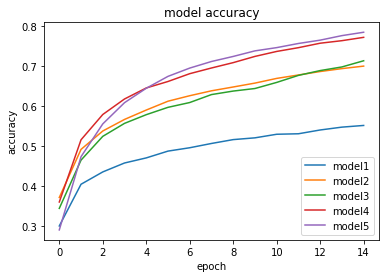

In [17]:
#display the graphs as a solution for question threes requirements
plot_accuracies(model1 = his1, model2 = his2, model3 = his3, model4 = his4, model5 = his5)

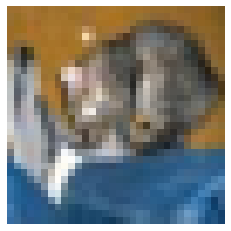

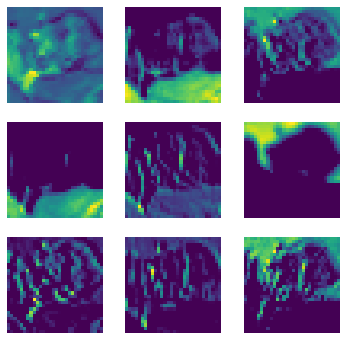

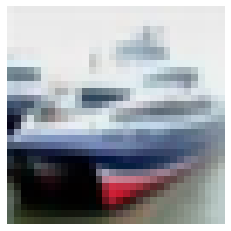

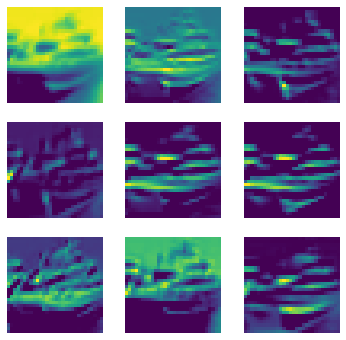

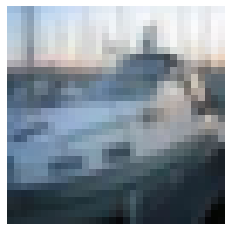

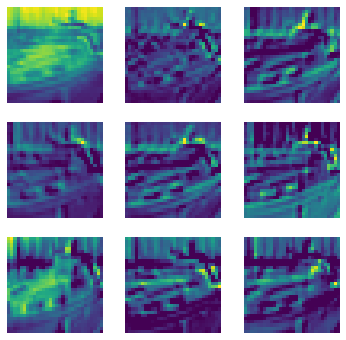

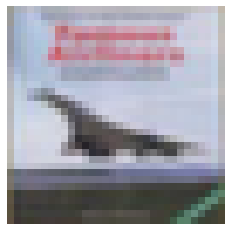

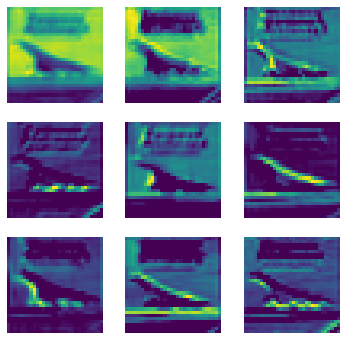

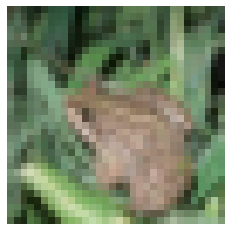

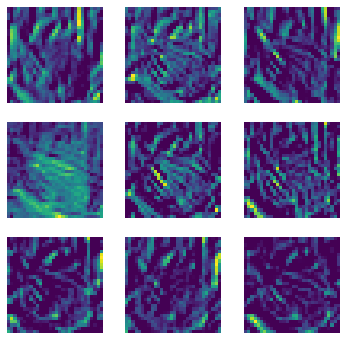

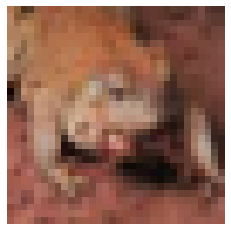

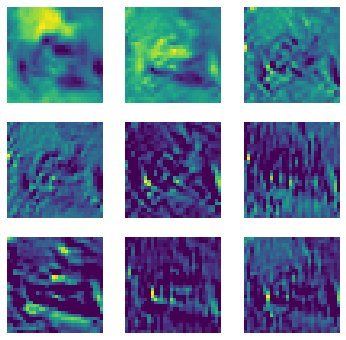

In [18]:
#display the images as the solution for question fours requirements
top_9_patches(mod1, his1, X_test[0])
top_9_patches(mod2, his2, X_test[1])
top_9_patches(mod3, his3, X_test[2])
top_9_patches(mod4, his4, X_test[3])
top_9_patches(mod5, his5, X_test[4])
top_9_patches(mod1, his1, X_test[5])